In [1]:
import numpy as np
import pandas as pd

from collections import Counter

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn.model_selection import train_test_split

from sklearn.ensemble import IsolationForest

from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression

from sklearn.metrics import classification_report
from sklearn.metrics import mean_absolute_error,mean_squared_error

import warnings
warnings.filterwarnings('ignore')

pd.set_option('display.max_columns',100)
pd.set_option('display.max_rows',1000)

In [2]:
df_mat = pd.read_pickle('df_mat-modelling-range_G3_5-repaired_G3_0_values.pkl')

df_mat.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,traveltime,studytime,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,G3,Mjob_at_home,Mjob_health,Mjob_other,Mjob_services,Mjob_teacher,Fjob_at_home,Fjob_health,Fjob_other,Fjob_services,Fjob_teacher,reason_course,reason_home,reason_other,reason_reputation,guardian_father,guardian_mother,guardian_other
0,1,1,18,1,1,0,4,4,2,2,1,0,0,0,1,1,0,0,4,3,4,1,1,3,1,2,1,0,0,0,0,0,0,0,0,1,1,0,0,0,0,1,0
1,1,1,17,1,1,1,1,1,1,2,0,1,0,0,0,1,1,0,5,3,3,1,1,3,2,2,1,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0
2,1,1,15,1,0,1,1,1,1,2,1,0,1,0,1,1,1,0,4,3,2,2,3,3,1,3,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0
3,1,1,15,1,1,1,4,2,1,3,0,1,1,1,1,1,1,1,3,2,2,1,1,5,2,4,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0
4,1,1,16,1,1,1,3,3,1,2,0,1,1,0,1,1,0,0,4,3,2,1,2,5,2,3,0,0,1,0,0,0,0,1,0,0,0,1,0,0,1,0,0


In [3]:
df_mat.shape

(395, 43)

## Isolation Forest

In [4]:
X = np.array(df_mat.drop('G3',axis = 1))

In [5]:
model = IsolationForest(random_state = 42)
model.fit(X)

IsolationForest(behaviour='deprecated', bootstrap=False, contamination='auto',
                max_features=1.0, max_samples='auto', n_estimators=100,
                n_jobs=None, random_state=42, verbose=0, warm_start=False)

In [6]:
y_if = model.predict(X)

In [7]:
y_if = pd.DataFrame(y_if)

y_if.columns = ['outlier']

In [8]:
df_mat = pd.concat([df_mat,y_if],axis = 1)

df_mat.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,traveltime,studytime,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,G3,Mjob_at_home,Mjob_health,Mjob_other,Mjob_services,Mjob_teacher,Fjob_at_home,Fjob_health,Fjob_other,Fjob_services,Fjob_teacher,reason_course,reason_home,reason_other,reason_reputation,guardian_father,guardian_mother,guardian_other,outlier
0,1,1,18,1,1,0,4,4,2,2,1,0,0,0,1,1,0,0,4,3,4,1,1,3,1,2,1,0,0,0,0,0,0,0,0,1,1,0,0,0,0,1,0,-1
1,1,1,17,1,1,1,1,1,1,2,0,1,0,0,0,1,1,0,5,3,3,1,1,3,2,2,1,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,1
2,1,1,15,1,0,1,1,1,1,2,1,0,1,0,1,1,1,0,4,3,2,2,3,3,1,3,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,-1
3,1,1,15,1,1,1,4,2,1,3,0,1,1,1,1,1,1,1,3,2,2,1,1,5,2,4,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,1
4,1,1,16,1,1,1,3,3,1,2,0,1,1,0,1,1,0,0,4,3,2,1,2,5,2,3,0,0,1,0,0,0,0,1,0,0,0,1,0,0,1,0,0,1


In [9]:
print(df_mat['outlier'].value_counts())

 1    221
-1    174
Name: outlier, dtype: int64


In [10]:
print(df_mat['outlier'].value_counts(normalize = True))

 1    0.559494
-1    0.440506
Name: outlier, dtype: float64


### Linear Regression

In [11]:
X = np.array(df_mat.drop('G3',axis = 1))
y = np.array(df_mat['G3'])

In [12]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.2,stratify = y,random_state = 42)

In [13]:
model = LinearRegression()
model.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [14]:
y_pred = model.predict(X_test)

In [15]:
y_test = pd.DataFrame(y_test)
y_pred = pd.DataFrame(y_pred)

df_temp = pd.concat([y_pred,y_test],axis = 1)
df_temp.columns = ['y_pred','y_test']

df_temp.head()

,y_pred,y_test
0,3.385986,3
1,3.250244,3
2,2.694824,4
3,3.230469,4
4,3.335205,4


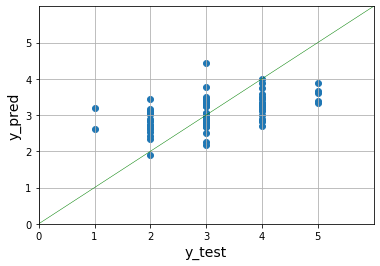

In [16]:
plt.scatter(df_temp['y_test'],df_temp['y_pred'])
plt.xlabel('y_test',fontsize = 14)
plt.ylabel('y_pred',fontsize = 14)
plt.xlim(0,6)
plt.ylim(0,6)
plt.xticks(list(range(0,6)))
plt.yticks(list(range(0,6)))
plt.grid()
y_lim = plt.ylim()
x_lim = plt.xlim()
plt.plot(x_lim,y_lim,color = 'g',linewidth = 0.5);

In [17]:
mean_absolute_error(y_pred,y_test)

0.6453625642800633

In [18]:
def rmse(y_true,y_pred):
    return np.sqrt(mean_squared_error(y_true,y_pred))

In [19]:
rmse(y_pred,y_test)

0.7964414708254262

### Logistic Regression

In [20]:
model = LogisticRegression()

In [21]:
model.fit(X_train,y_train)

y_pred = model.predict(X_test)

In [22]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           1       0.00      0.00      0.00         2
           2       0.40      0.24      0.30        17
           3       0.44      0.68      0.53        34
           4       0.33      0.19      0.24        21
           5       0.60      0.60      0.60         5

    accuracy                           0.43        79
   macro avg       0.36      0.34      0.33        79
weighted avg       0.40      0.43      0.40        79



In [23]:
y_test = pd.DataFrame(y_test)
y_pred = pd.DataFrame(y_pred)

df_temp = pd.concat([y_pred,y_test],axis = 1)
df_temp.columns = ['y_pred','y_test']

df_temp.head()

,y_pred,y_test
0,4,3
1,3,3
2,2,4
3,3,4
4,3,4


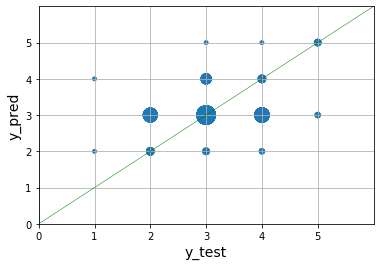

In [24]:
c = Counter(zip(df_temp['y_pred'].tolist(),df_temp['y_test'].tolist()))
s = [15 * c[(x,y)] for x,y in zip(df_temp['y_pred'].tolist(),df_temp['y_test'].tolist())]

plt.scatter(df_temp['y_test'],df_temp['y_pred'],s = s)
plt.xlabel('y_test',fontsize = 14)
plt.ylabel('y_pred',fontsize = 14)
plt.xlim(0,6)
plt.ylim(0,6)
plt.xticks(list(range(0,6)))
plt.yticks(list(range(0,6)))
plt.grid()
y_lim = plt.ylim()
x_lim = plt.xlim()
plt.plot(x_lim,y_lim,color = 'g',linewidth = 0.5);

In [25]:
mean_absolute_error(y_pred,y_test)

0.6582278481012658

In [26]:
rmse(y_pred,y_test)

0.9277712507244908